In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# 회귀분석
from statsmodels.formula.api import ols
# qqplot, 회귀분석의 상수항 추가
from statsmodels.api import qqplot, add_constant
# 선형 모델 formula(y ~ X1 + X2 + ...)
import statsmodels.formula.api as smf
# 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
# 선형회귀모형
from sklearn.linear_model import LinearRegression
# 변수 선택법(후진제거법)
from sklearn.feature_selection import RFE
# Scale 변환->표준화 회귀계수 산출
from sklearn.preprocessing import StandardScaler
# 평가함수
from statsmodels.tools.eval_measures import rmse
import matplotlib
# 패키지 불러오기
from sklearn.linear_model import Ridge, Lasso, ElasticNet
#from sklearn.tree import export_graphviz  환경 설정하기 어려움
#import graphviz

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
# 나무 구조 시각화  
from sklearn.tree import plot_tree
# 예측 / 회귀 random forest
from sklearn.ensemble import RandomForestRegressor
matplotlib.rc('font', family = 'Malgun Gothic') 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import scale, minmax_scale, robust_scale

#평가 함수
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
# 음수 표시
matplotlib.rc('axes', unicode_minus=False)
matplotlib.rc('font', family = 'Malgun Gothic') 

from scipy.stats import chi2_contingency
from scipy import stats

# 로지스틱 회귀
from statsmodels.api import Logit
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

In [31]:
df = pd.read_csv("C:/Users/USER/Desktop/반도체 공정/데이터/Oxidation.CSV",encoding='euc-kr')
df

,Unnamed: 0,No_Die,Ox_Chamber,process,type,Temp_OXid,Vapor,ppm,Pressure,Oxid_time,thickness,Lot_Num,Wafer_Num,Datetime
0,0,NOLSM325131325,2,Oxidation,dry,1214.307948,O2,26.69,0.203,120,713.132,13,28,01-03-2019
1,1,NOLSM326132326,2,Oxidation,dry,978.110792,O2,30.86,0.217,137,714.295,13,29,01-03-2019
2,2,NOLSM327133327,2,Oxidation,dry,1176.019149,O2,31.07,0.218,116,710.114,13,30,01-03-2019
3,3,NOLSM328134328,2,Oxidation,dry,933.442733,O2,31.04,0.196,143,710.617,13,31,01-03-2019
4,4,NOLSM329135329,2,Oxidation,wet,1140.598752,H2O,31.37,0.215,76,711.632,13,32,01-03-2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1699,1699,NOLSM8483211,3,Oxidation,wet,1275.182502,H2O,45.10,0.214,21,715.498,32,11,28-02-2019
1700,1700,NOLSM8493212,1,Oxidation,wet,1268.105427,H2O,45.07,0.215,22,707.179,32,12,28-02-2019
1701,1701,NOLSM8503213,1,Oxidation,wet,1279.160563,H2O,45.12,0.214,21,712.946,32,13,28-02-2019
1702,1702,NOLSM8513214,1,Oxidation,wet,1272.804948,H2O,45.34,0.213,20,711.987,32,14,28-02-2019


In [35]:
df2 = pd.read_csv("C:/Users/USER/Desktop/반도체 공정/데이터/Qualitylnspection.csv",encoding='euc-kr')
df2

,Unnamed: 0,No_Die,Lot_Num,Wafer_Num,Datetime,Target,Error_message,Wafer_map
0,0,NOLSM325131325,13,28,01-03-2019,141,none,[[0 0 0 0 0 0 0 0 0 0 1 2 1 1 1 2 0 0 0 0 0 0 ...
1,1,NOLSM326132326,13,29,01-03-2019,55,none,[[0 0 0 0 0 0 0 0 0 0 2 2 2 2 1 2 0 0 0 0 0 0 ...
2,2,NOLSM327133327,13,30,01-03-2019,96,none,[[0 0 0 0 0 0 0 0 0 0 1 2 1 1 1 2 0 0 0 0 0 0 ...
3,3,NOLSM328134328,13,31,01-03-2019,105,none,[[0 0 0 0 0 0 0 0 0 0 2 1 1 1 1 2 0 0 0 0 0 0 ...
4,4,NOLSM329135329,13,32,01-03-2019,79,none,[[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 ...
...,...,...,...,...,...,...,...,...
1699,1699,NOLSM8483211,32,11,28-02-2019,78,none,[[0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 0 0 0 0 0 0 ...
1700,1700,NOLSM8493212,32,12,28-02-2019,42,none,[[0 0 0 0 0 0 0 0 0 0 2 2 2 2 1 1 0 0 0 0 0 0 ...
1701,1701,NOLSM8503213,32,13,28-02-2019,42,none,[[0 0 0 0 0 0 0 0 0 0 1 1 1 1 2 1 0 0 0 0 0 0 ...
1702,1702,NOLSM8513214,32,14,28-02-2019,24,none,[[0 0 0 0 0 0 0 0 0 0 2 1 2 2 2 1 0 0 0 0 0 0 ...


In [37]:
df2.isnull().sum()

Unnamed: 0       0
No_Die           0
Lot_Num          0
Wafer_Num        0
Datetime         0
Target           0
Error_message    0
Wafer_map        0
dtype: int64

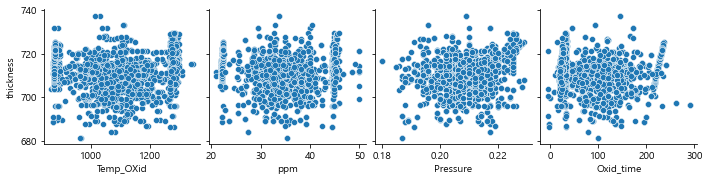

In [33]:
sns.pairplot(df, y_vars = 'thickness', x_vars = ['Temp_OXid','ppm','Pressure','Oxid_time'])

<AxesSubplot:>

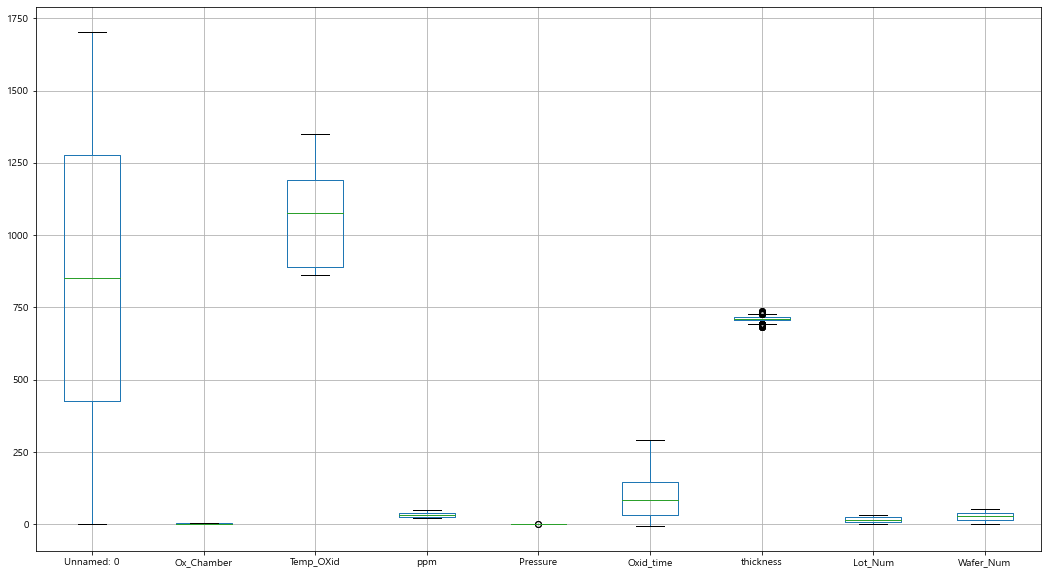

In [9]:
df.boxplot(figsize= (18,10))

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'Ox_Chamber'}>,
        <AxesSubplot:title={'center':'Temp_OXid'}>],
       [<AxesSubplot:title={'center':'ppm'}>,
        <AxesSubplot:title={'center':'Pressure'}>,
        <AxesSubplot:title={'center':'Oxid_time'}>],
       [<AxesSubplot:title={'center':'thickness'}>,
        <AxesSubplot:title={'center':'Lot_Num'}>,
        <AxesSubplot:title={'center':'Wafer_Num'}>]], dtype=object)

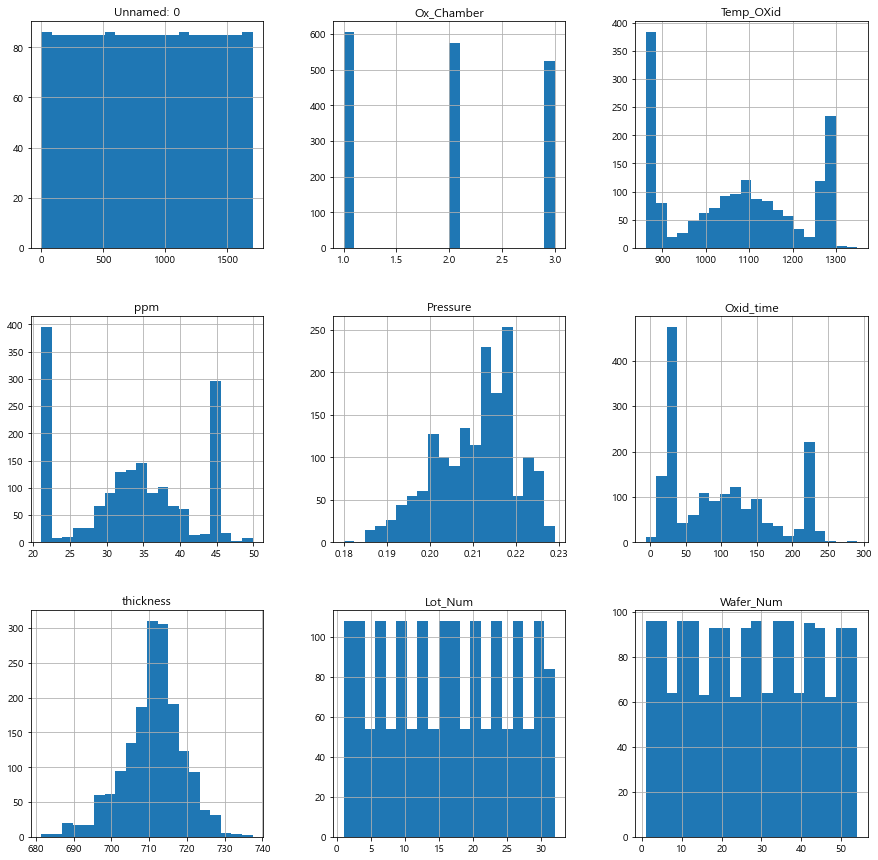

In [11]:
df.hist(bins  = 20, figsize = (15, 15))

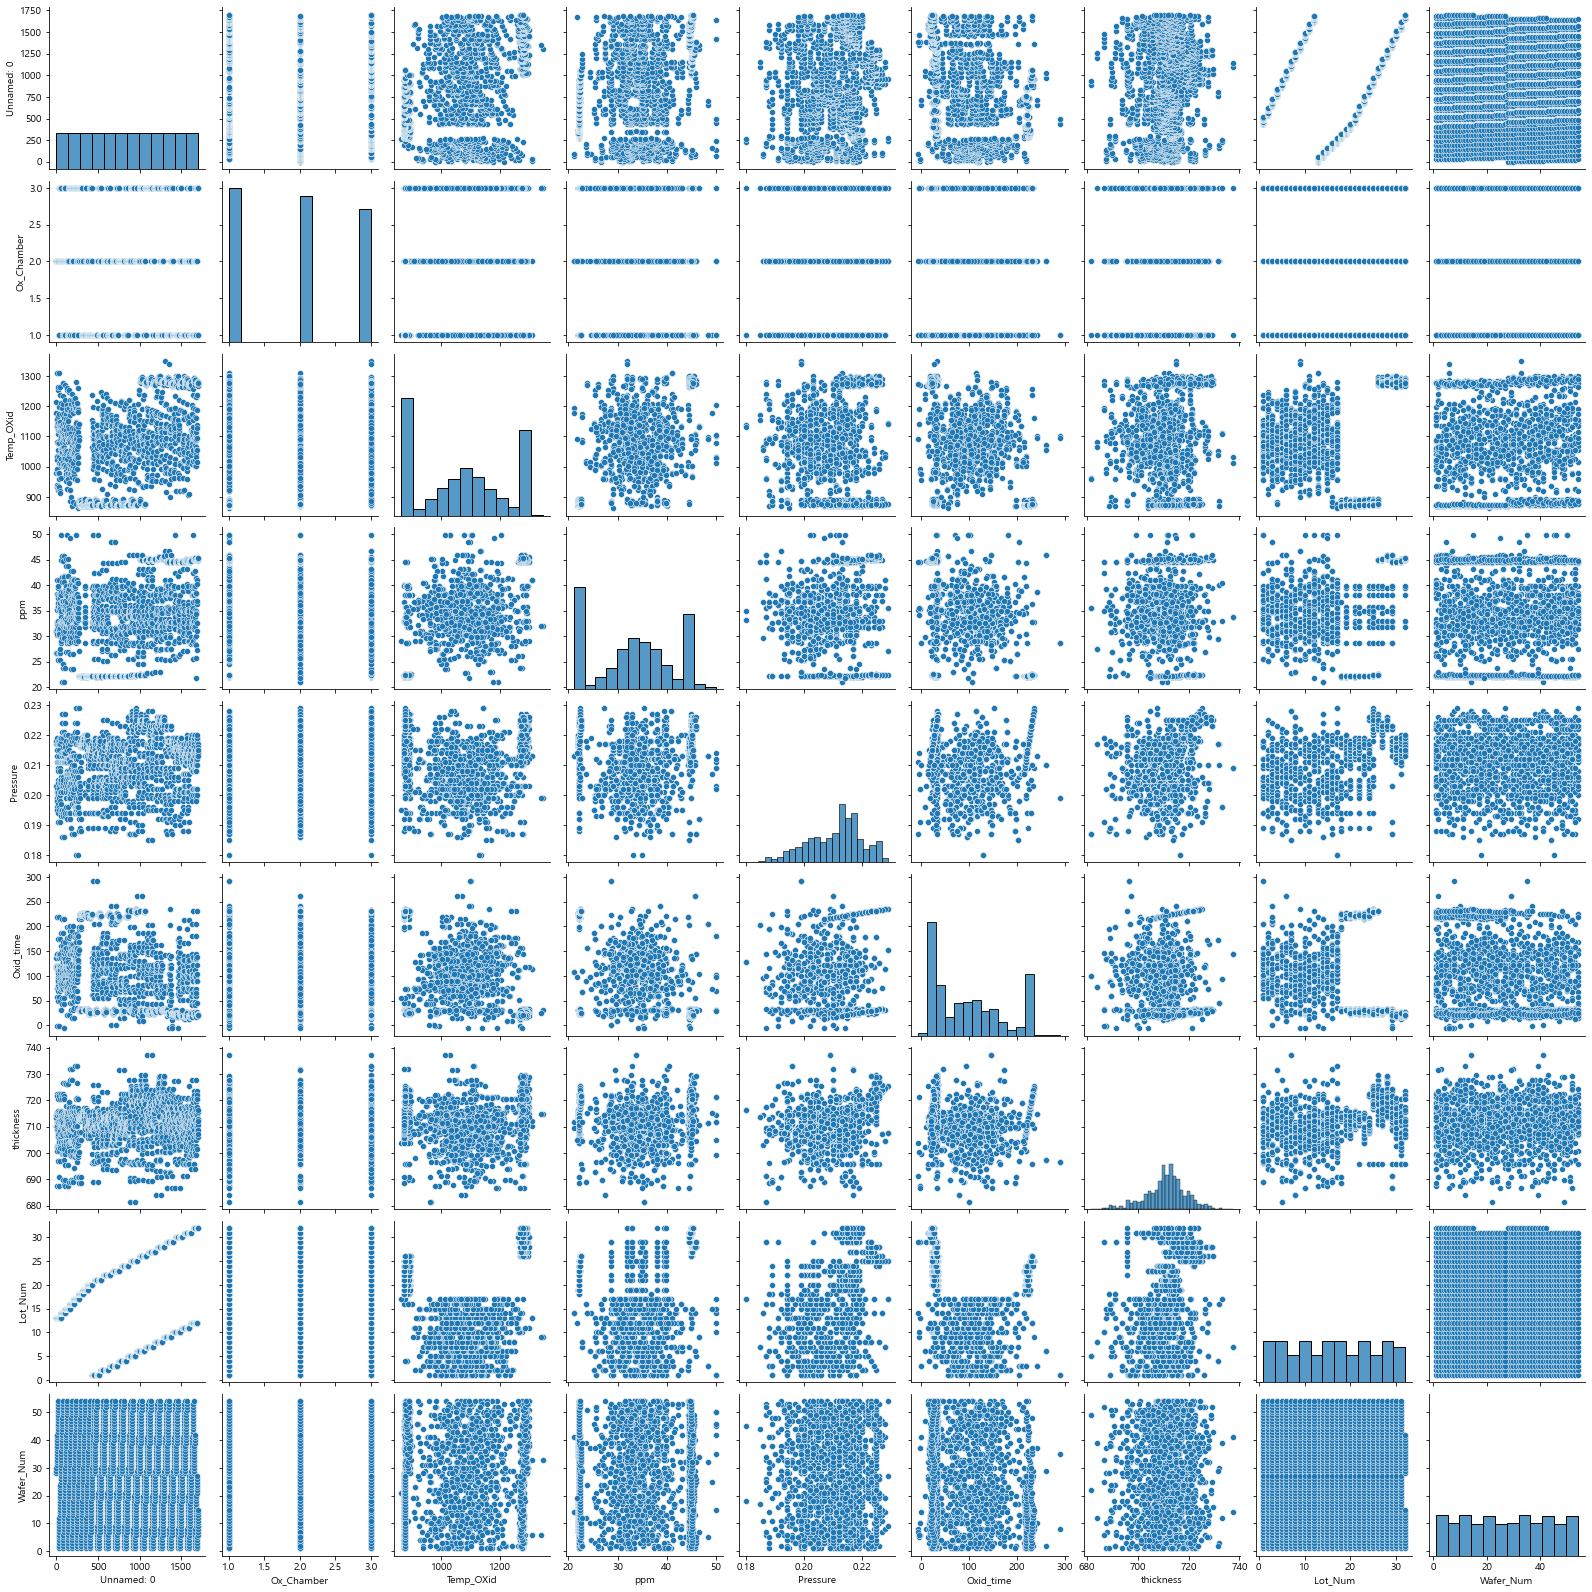

In [34]:
sns.pairplot(df)

In [14]:
df.corr().round(3)

,Unnamed: 0,Ox_Chamber,Temp_OXid,ppm,Pressure,Oxid_time,thickness,Lot_Num,Wafer_Num
Unnamed: 0,1.000,-0.045,0.461,0.405,0.165,-0.356,0.093,0.216,-0.045
Ox_Chamber,-0.045,1.000,-0.021,-0.043,-0.004,0.031,0.032,0.039,-0.052
Temp_OXid,0.461,-0.021,1.000,0.748,0.079,-0.460,0.058,0.133,0.045
ppm,0.405,-0.043,0.748,1.000,0.064,-0.486,0.055,0.111,0.044
Pressure,0.165,-0.004,0.079,0.064,1.000,-0.033,0.316,0.484,-0.048
Oxid_time,-0.356,0.031,-0.460,-0.486,-0.033,1.000,-0.069,-0.240,-0.305
thickness,0.093,0.032,0.058,0.055,0.316,-0.069,1.000,0.326,0.014
Lot_Num,0.216,0.039,0.133,0.111,0.484,-0.240,0.326,1.000,-0.012
Wafer_Num,-0.045,-0.052,0.045,0.044,-0.048,-0.305,0.014,-0.012,1.000


In [7]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

In [8]:
chamber = pd.read_csv("C:/Users/USER/Desktop/반도체 공정/데이터/Chamber2.csv",encoding='euc-kr')
chamber

,Unnamed: 0,No_Die,Ox_Chamber,photo_soft_Chamber,lithography_Chamber,Etching_Chamber,Chamber_Num,Sum,Target
0,0,NOLSM574227,1,1,1,1,1,11111,45
1,1,NOLSM326132,1,1,1,1,1,11111,55
2,2,NOLSM7177,1,1,1,1,1,11111,97
3,3,NOLSM4144,1,1,1,1,1,11111,117
4,4,NOLSM733284733,1,1,1,1,1,11111,132
...,...,...,...,...,...,...,...,...,...
1699,1699,NOLSM3511327,3,3,3,3,3,33333,74
1700,1700,NOLSM200811,3,3,3,3,3,33333,107
1701,1701,NOLSM240924240,3,3,3,3,3,33333,68
1702,1702,NOLSM6472426,3,3,3,3,3,33333,51


In [9]:
a = set(list(chamber['Sum']))

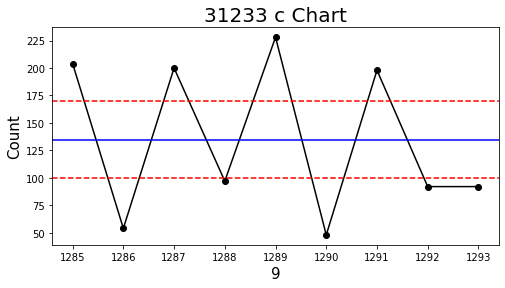

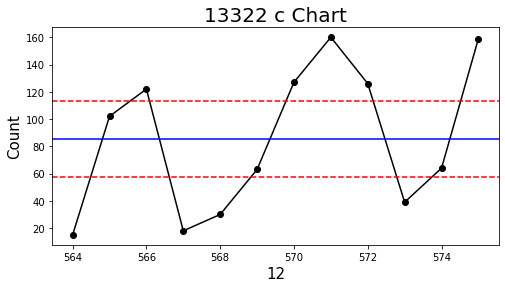

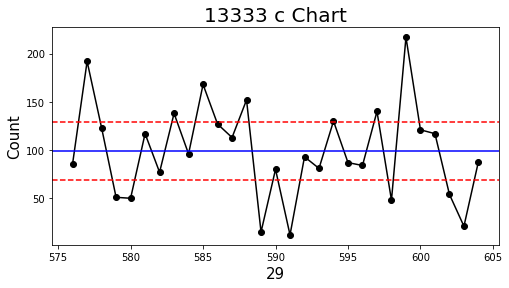

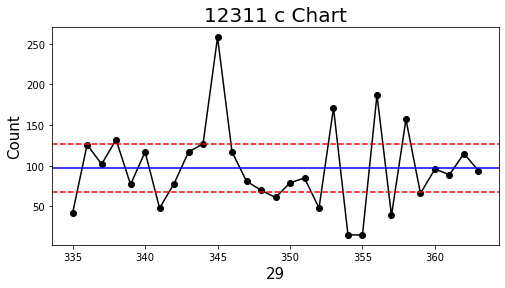

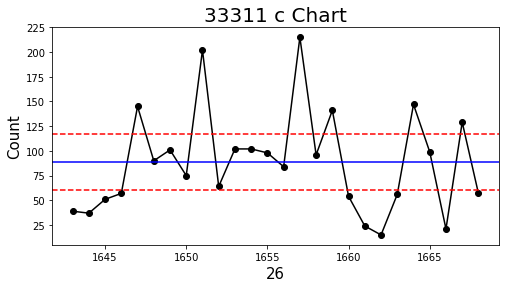

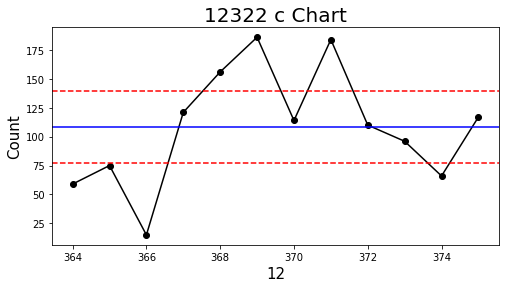

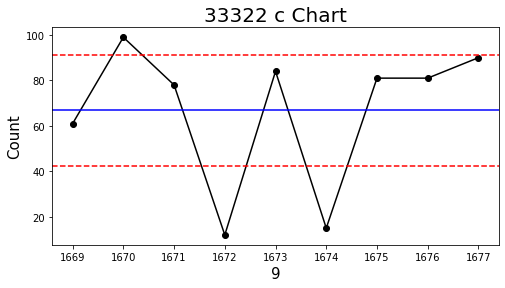

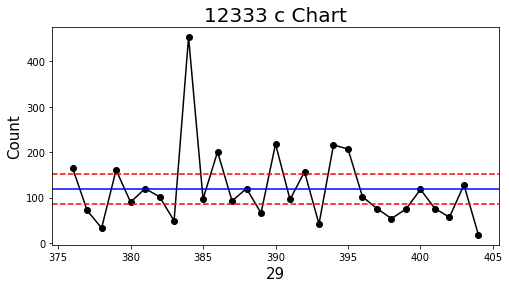

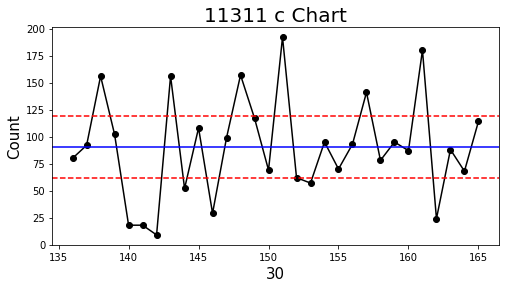

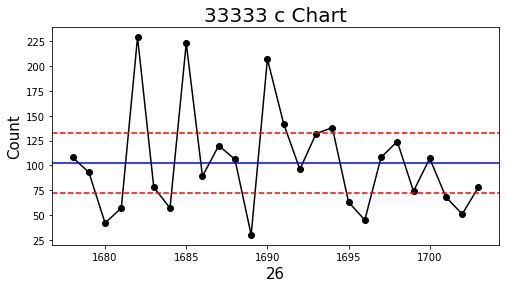

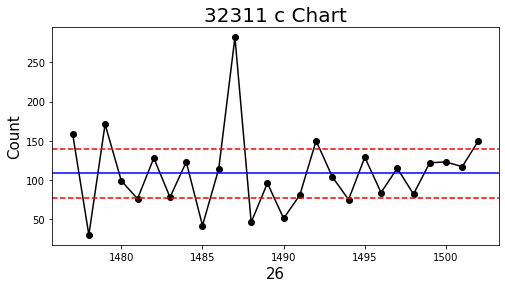

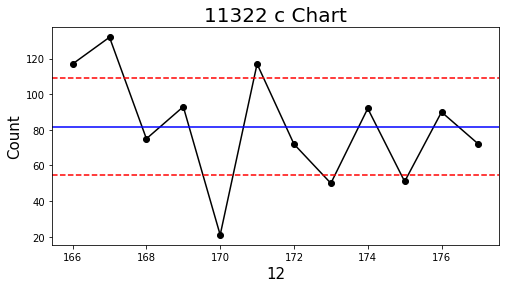

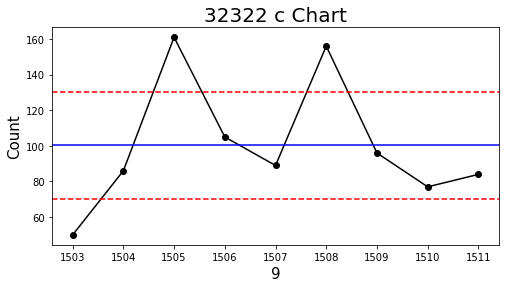

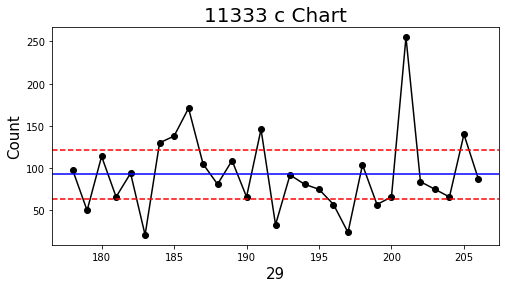

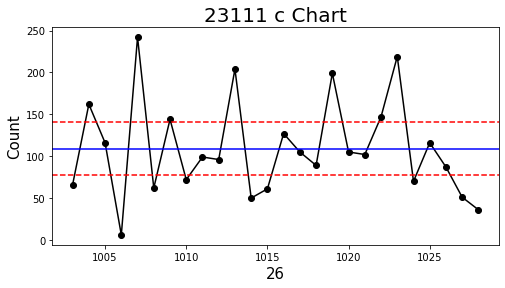

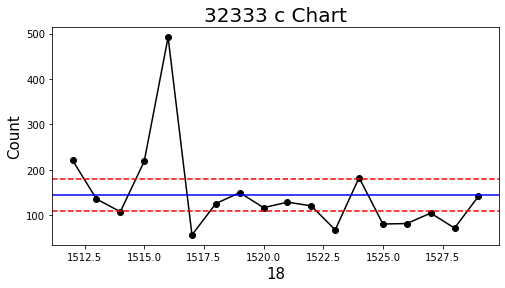

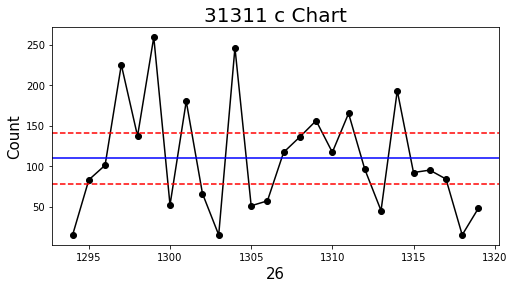

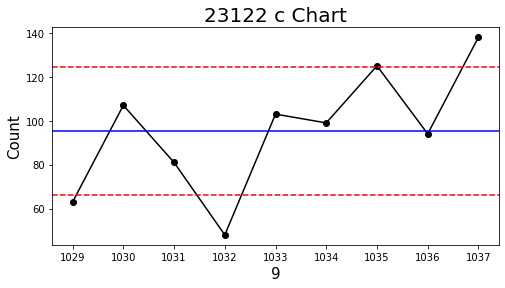

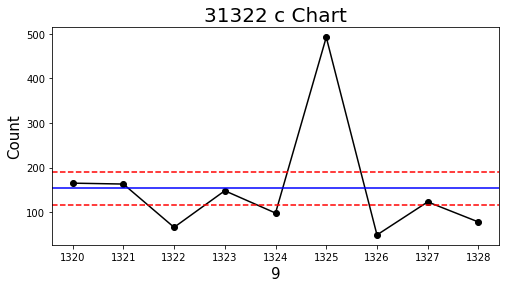

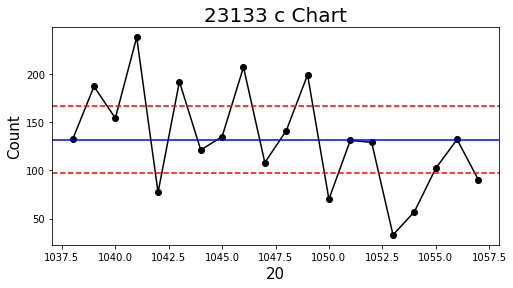

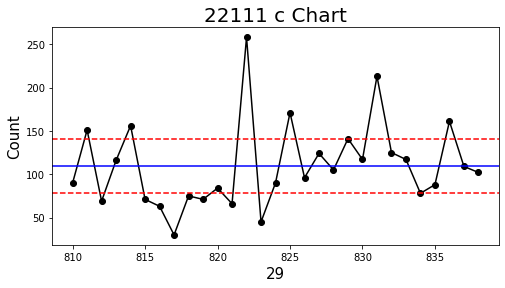

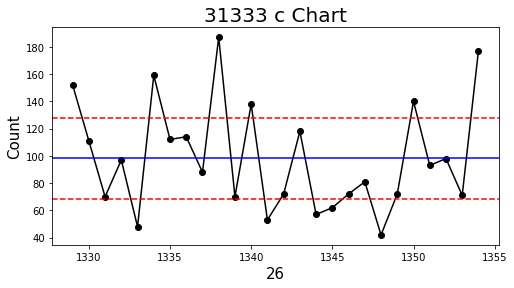

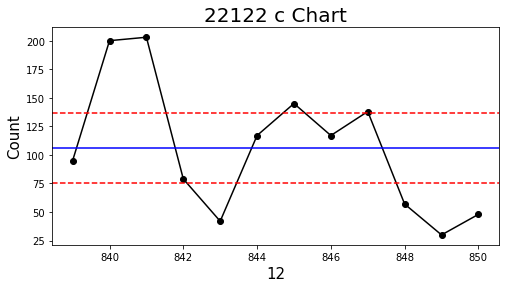

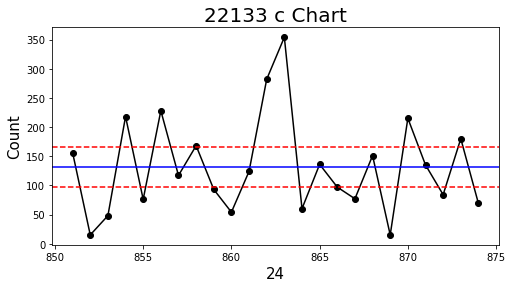

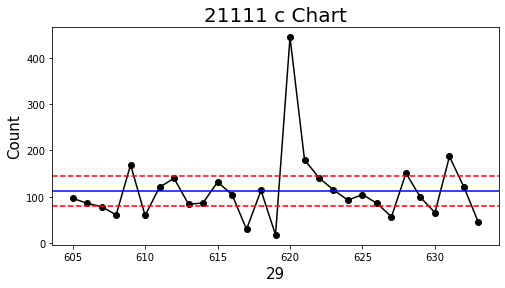

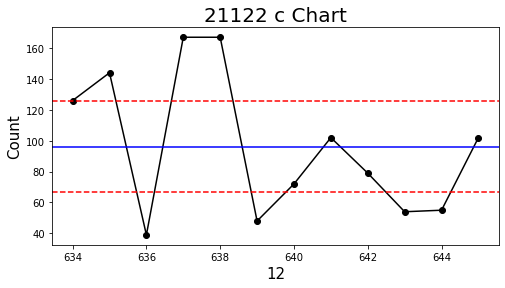

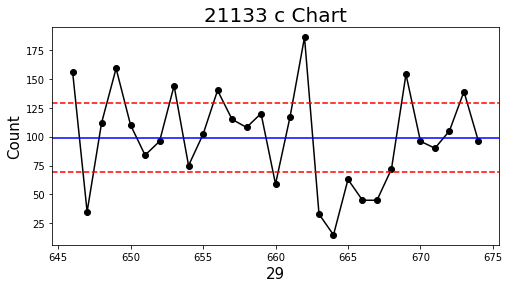

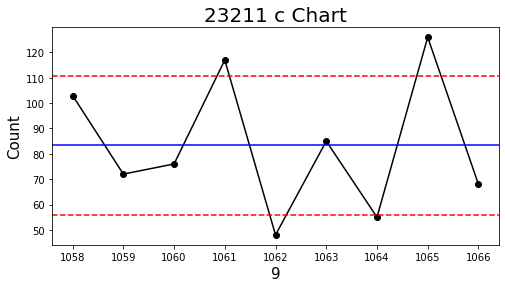

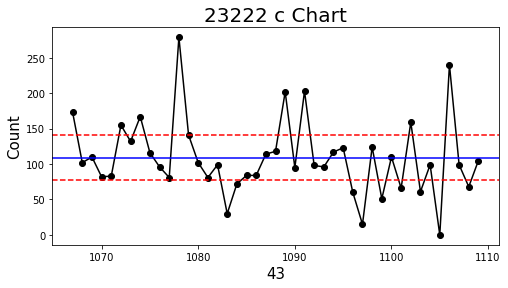

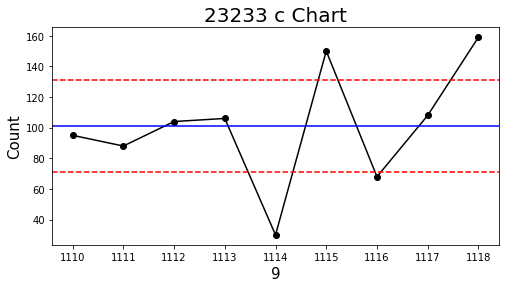

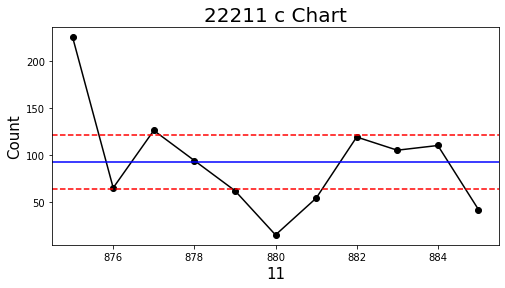

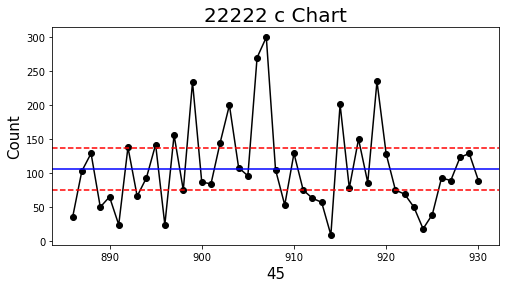

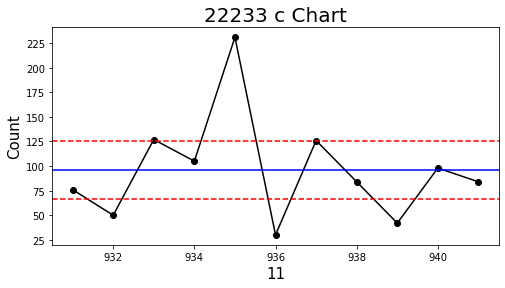

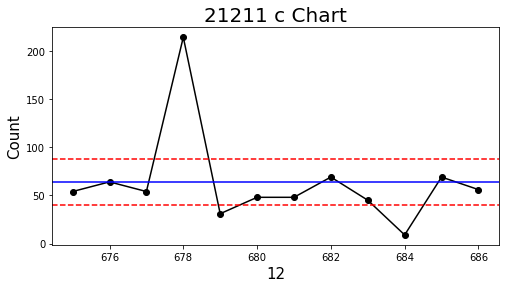

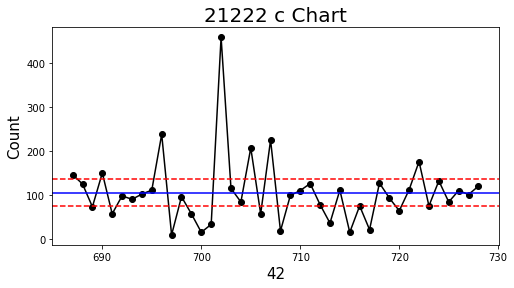

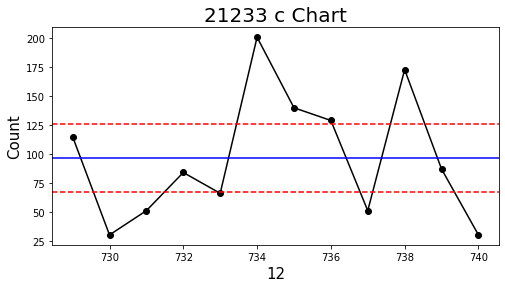

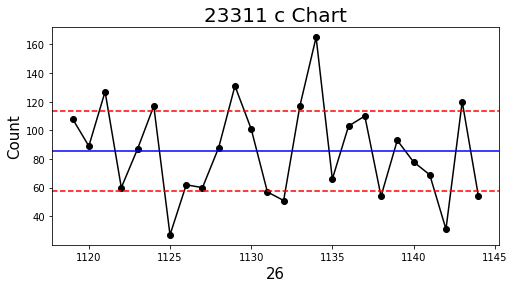

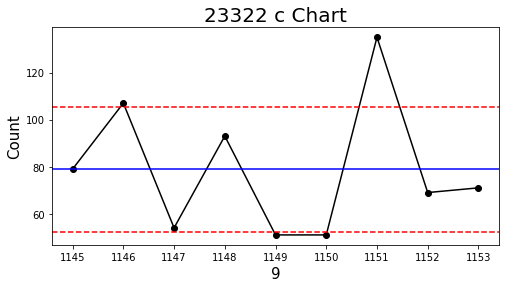

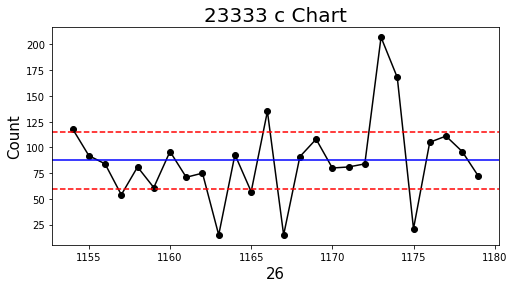

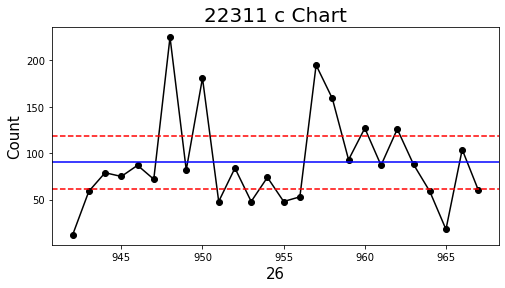

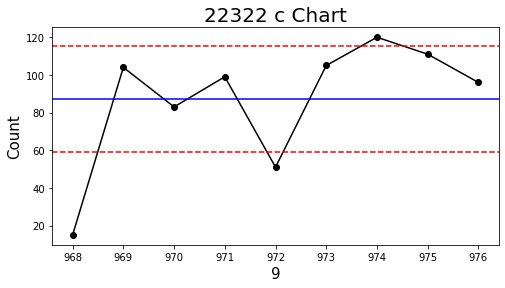

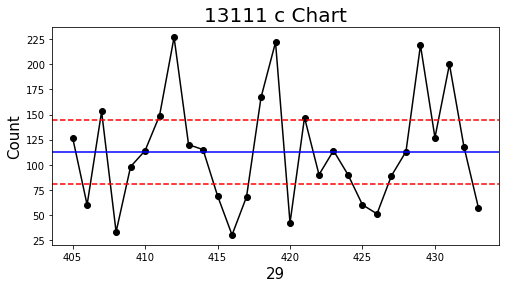

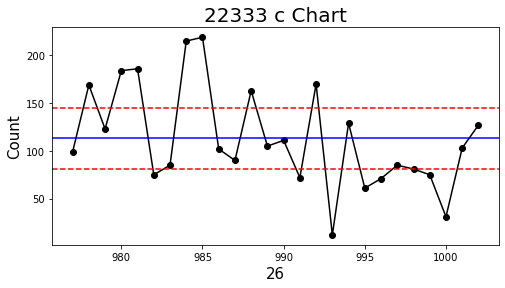

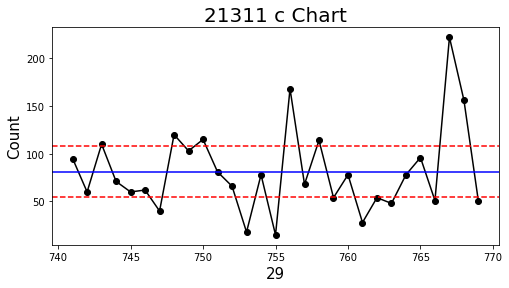

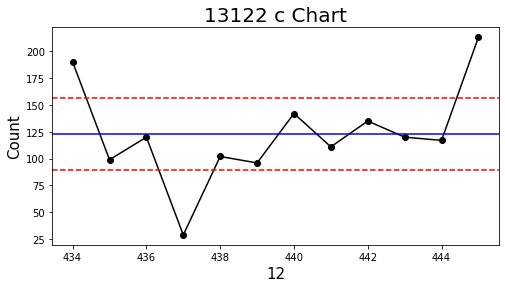

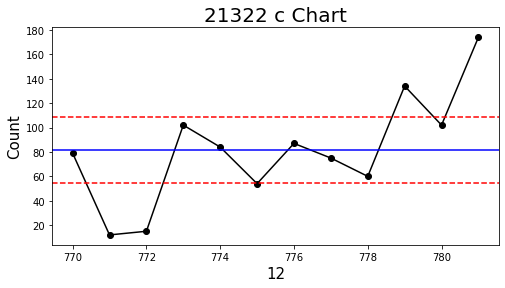

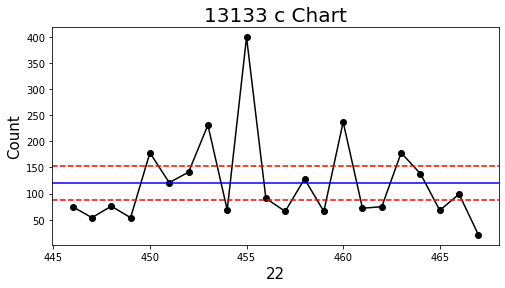

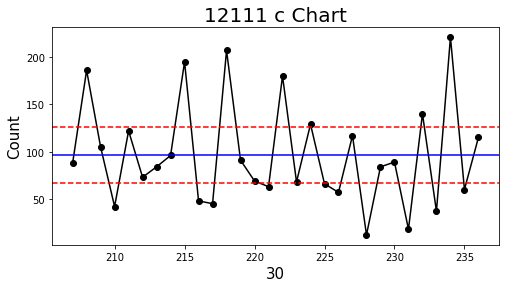

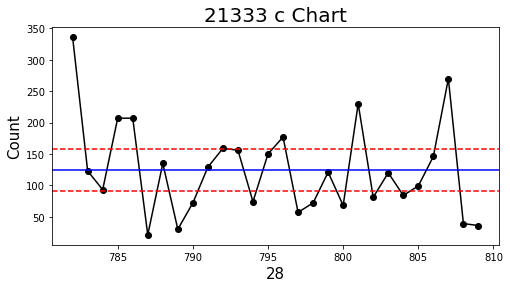

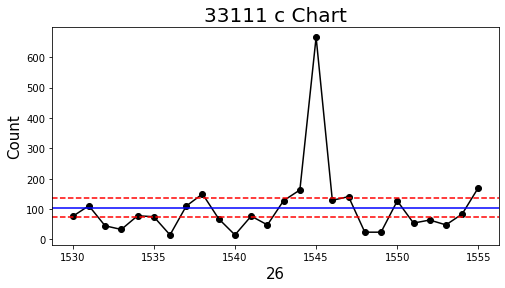

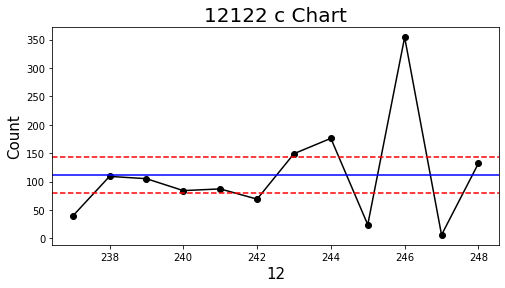

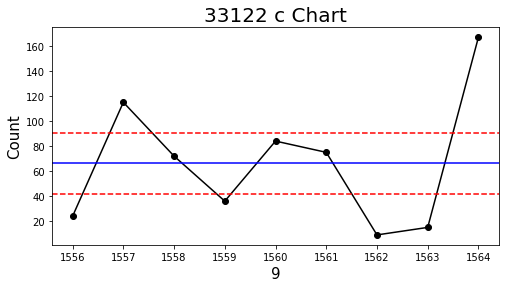

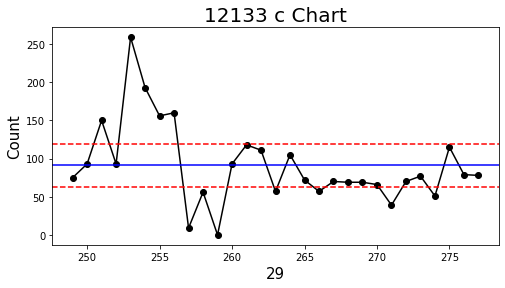

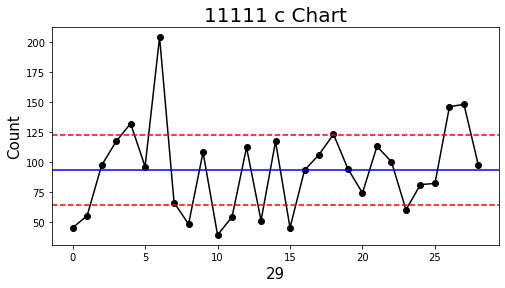

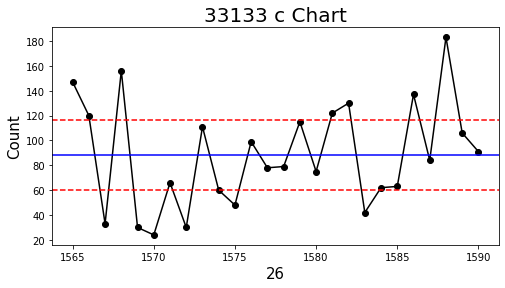

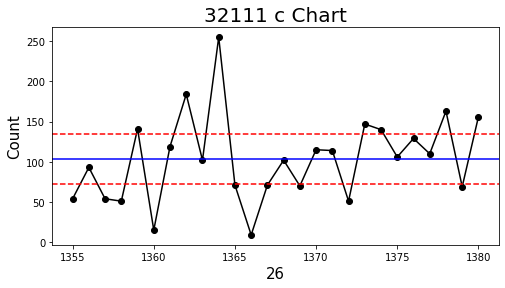

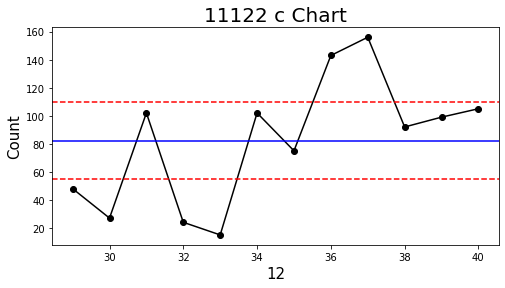

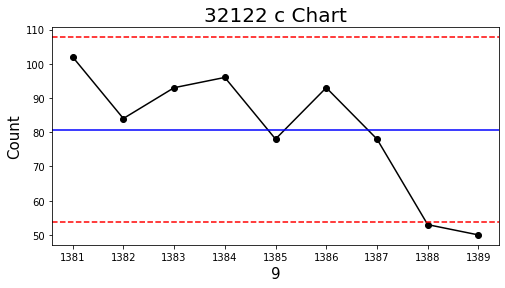

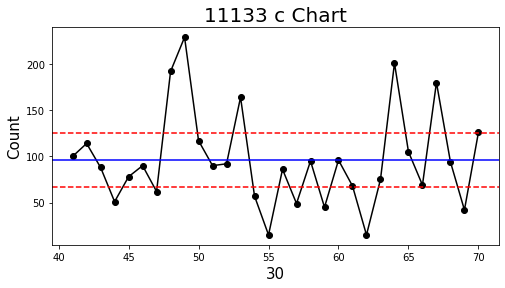

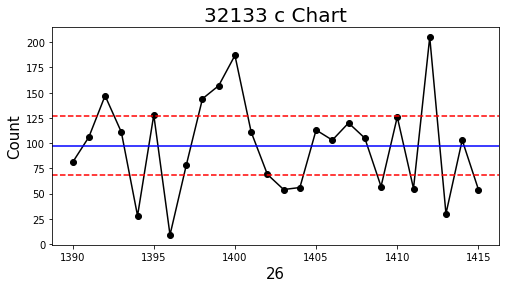

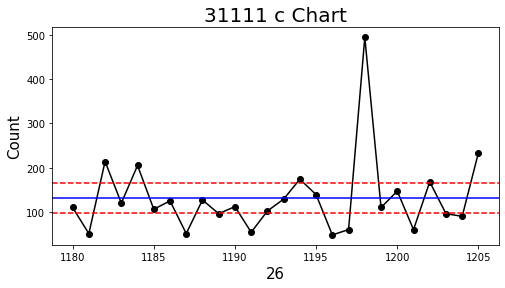

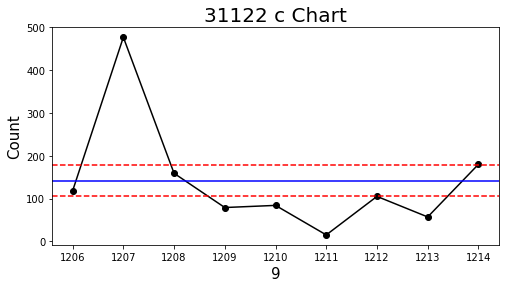

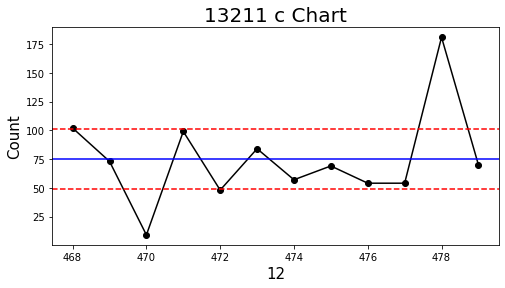

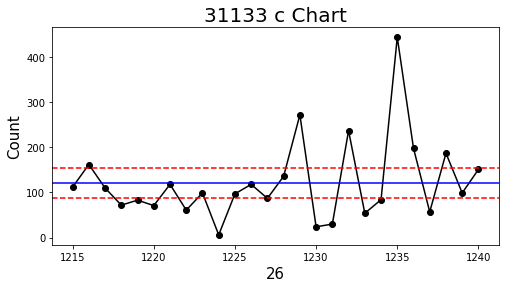

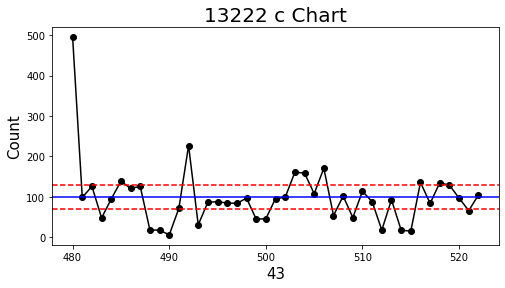

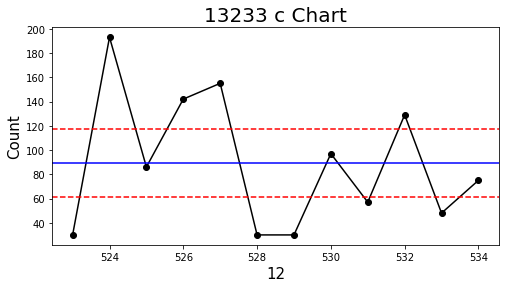

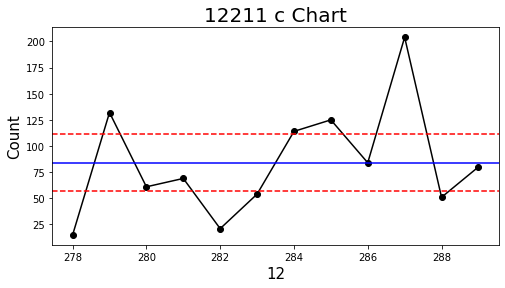

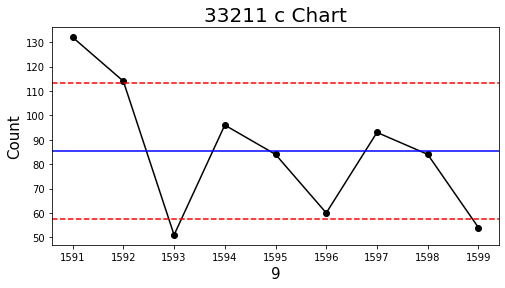

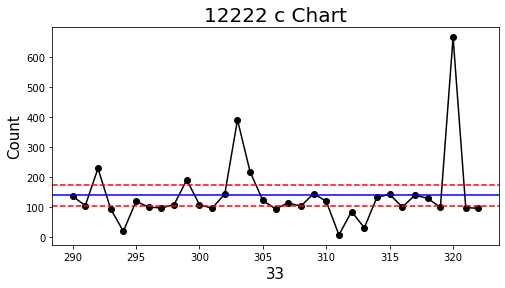

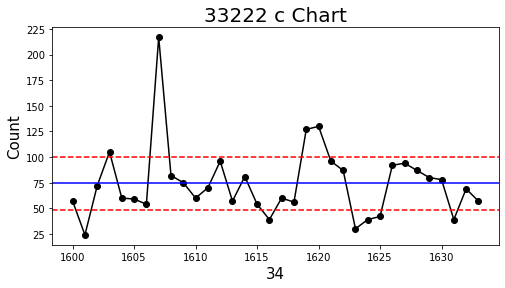

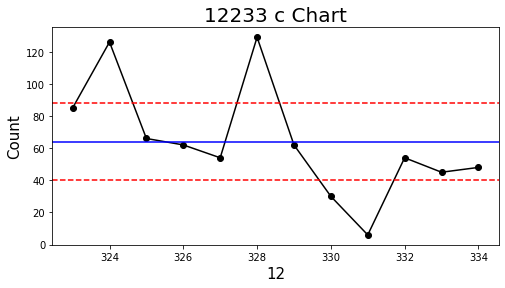

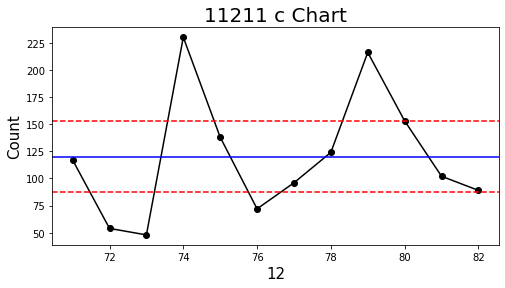

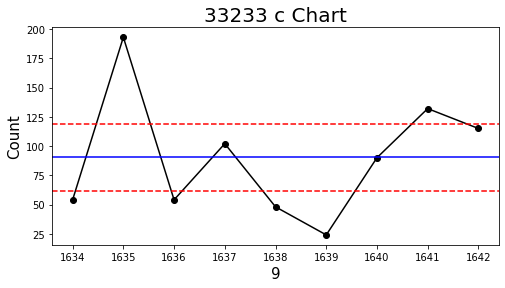

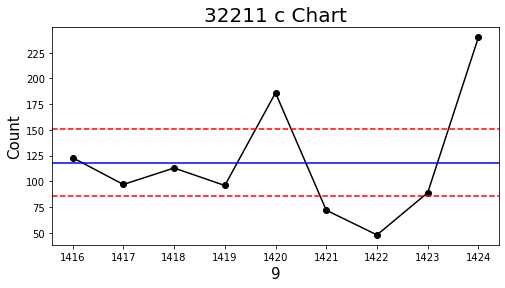

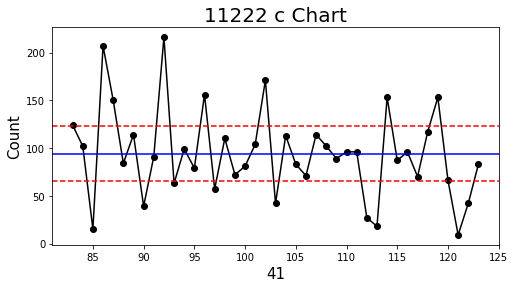

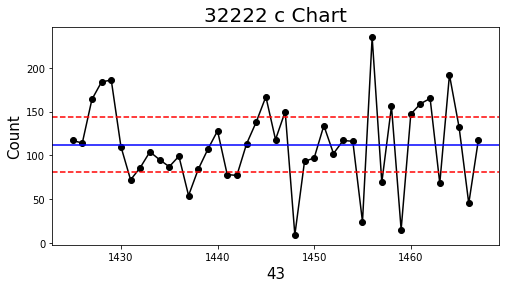

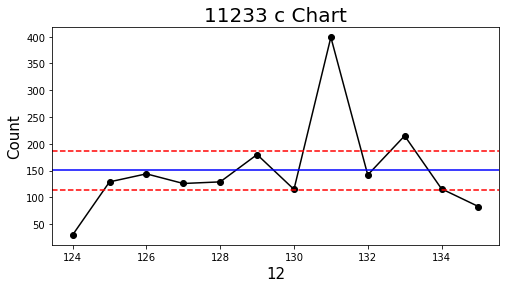

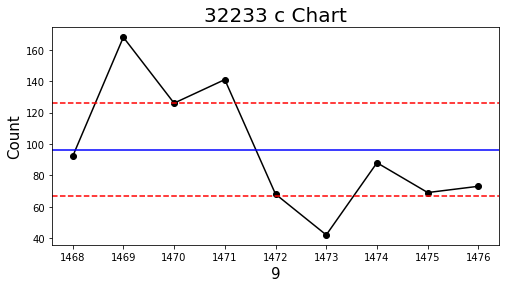

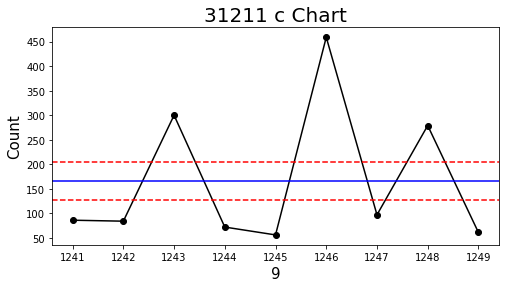

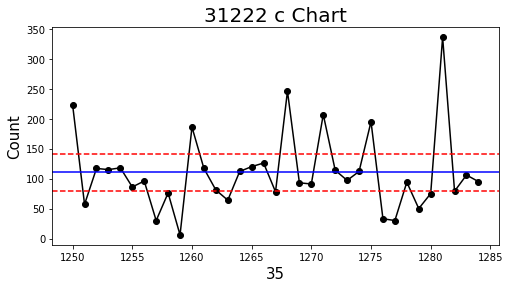

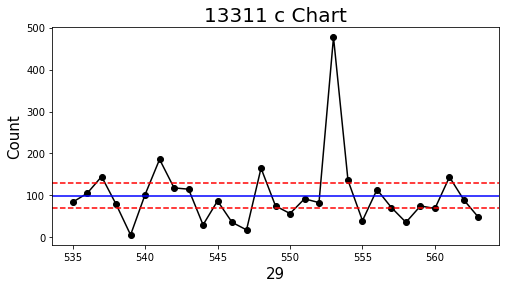

In [13]:
for i in a :
    num1 = chamber[chamber['Sum'] == i].index[0]
    num2 = chamber[chamber['Sum'] == i].index[-1]
    k = chamber.loc[num1:num2,:]
    fig = plt.figure(figsize = (8,4))
    plt.plot(k['Target'], linestyle = '-', marker = 'o', color = 'black')
    plt.axhline(statistics.mean(k['Target'])+3*np.sqrt(statistics.mean(k['Target'])),
                color = 'red', linestyle = 'dashed')
    plt.axhline(statistics.mean(k['Target'])-3*np.sqrt(statistics.mean(k['Target'])),
                color = 'red', linestyle = 'dashed')
    plt.axhline(statistics.mean(k['Target']), color = 'blue')
    plt.title('{} c Chart'.format(i), fontsize = 20)
    plt.ylabel('Count', fontsize = 15)
    plt.xlabel(len(k), fontsize = 15)
    plt.show()

In [50]:
df = pd.read_csv("C:/Users/USER/Desktop/반도체 공정/데이터/Oxidation.CSV",encoding='euc-kr')
df

,Unnamed: 0,No_Die,Ox_Chamber,process,type,Temp_OXid,Vapor,ppm,Pressure,Oxid_time,thickness,Lot_Num,Wafer_Num,Datetime
0,0,NOLSM325131325,2,Oxidation,dry,1214.307948,O2,26.69,0.203,120,713.132,13,28,01-03-2019
1,1,NOLSM326132326,2,Oxidation,dry,978.110792,O2,30.86,0.217,137,714.295,13,29,01-03-2019
2,2,NOLSM327133327,2,Oxidation,dry,1176.019149,O2,31.07,0.218,116,710.114,13,30,01-03-2019
3,3,NOLSM328134328,2,Oxidation,dry,933.442733,O2,31.04,0.196,143,710.617,13,31,01-03-2019
4,4,NOLSM329135329,2,Oxidation,wet,1140.598752,H2O,31.37,0.215,76,711.632,13,32,01-03-2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1699,1699,NOLSM8483211,3,Oxidation,wet,1275.182502,H2O,45.10,0.214,21,715.498,32,11,28-02-2019
1700,1700,NOLSM8493212,1,Oxidation,wet,1268.105427,H2O,45.07,0.215,22,707.179,32,12,28-02-2019
1701,1701,NOLSM8503213,1,Oxidation,wet,1279.160563,H2O,45.12,0.214,21,712.946,32,13,28-02-2019
1702,1702,NOLSM8513214,1,Oxidation,wet,1272.804948,H2O,45.34,0.213,20,711.987,32,14,28-02-2019


In [51]:
target= pd.read_csv("C:/Users/USER/Desktop/반도체 공정/데이터/Qualitylnspection.csv",encoding='euc-kr')
target

,Unnamed: 0,No_Die,Lot_Num,Wafer_Num,Datetime,Target,Error_message,Wafer_map
0,0,NOLSM325131325,13,28,01-03-2019,141,none,[[0 0 0 0 0 0 0 0 0 0 1 2 1 1 1 2 0 0 0 0 0 0 ...
1,1,NOLSM326132326,13,29,01-03-2019,55,none,[[0 0 0 0 0 0 0 0 0 0 2 2 2 2 1 2 0 0 0 0 0 0 ...
2,2,NOLSM327133327,13,30,01-03-2019,96,none,[[0 0 0 0 0 0 0 0 0 0 1 2 1 1 1 2 0 0 0 0 0 0 ...
3,3,NOLSM328134328,13,31,01-03-2019,105,none,[[0 0 0 0 0 0 0 0 0 0 2 1 1 1 1 2 0 0 0 0 0 0 ...
4,4,NOLSM329135329,13,32,01-03-2019,79,none,[[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 ...
...,...,...,...,...,...,...,...,...
1699,1699,NOLSM8483211,32,11,28-02-2019,78,none,[[0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 0 0 0 0 0 0 ...
1700,1700,NOLSM8493212,32,12,28-02-2019,42,none,[[0 0 0 0 0 0 0 0 0 0 2 2 2 2 1 1 0 0 0 0 0 0 ...
1701,1701,NOLSM8503213,32,13,28-02-2019,42,none,[[0 0 0 0 0 0 0 0 0 0 1 1 1 1 2 1 0 0 0 0 0 0 ...
1702,1702,NOLSM8513214,32,14,28-02-2019,24,none,[[0 0 0 0 0 0 0 0 0 0 2 1 2 2 2 1 0 0 0 0 0 0 ...


In [85]:
target=pd.DataFrame(target['Target'])
target

,Target
0,141
1,55
2,96
3,105
4,79
...,...
1699,78
1700,42
1701,42
1702,24


In [55]:
sss= pd.concat([df, target], axis = 1)

In [56]:
sss

,Unnamed: 0,No_Die,Ox_Chamber,process,type,Temp_OXid,Vapor,ppm,Pressure,Oxid_time,thickness,Lot_Num,Wafer_Num,Datetime,Target
0,0,NOLSM325131325,2,Oxidation,dry,1214.307948,O2,26.69,0.203,120,713.132,13,28,01-03-2019,141
1,1,NOLSM326132326,2,Oxidation,dry,978.110792,O2,30.86,0.217,137,714.295,13,29,01-03-2019,55
2,2,NOLSM327133327,2,Oxidation,dry,1176.019149,O2,31.07,0.218,116,710.114,13,30,01-03-2019,96
3,3,NOLSM328134328,2,Oxidation,dry,933.442733,O2,31.04,0.196,143,710.617,13,31,01-03-2019,105
4,4,NOLSM329135329,2,Oxidation,wet,1140.598752,H2O,31.37,0.215,76,711.632,13,32,01-03-2019,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1699,1699,NOLSM8483211,3,Oxidation,wet,1275.182502,H2O,45.10,0.214,21,715.498,32,11,28-02-2019,78
1700,1700,NOLSM8493212,1,Oxidation,wet,1268.105427,H2O,45.07,0.215,22,707.179,32,12,28-02-2019,42
1701,1701,NOLSM8503213,1,Oxidation,wet,1279.160563,H2O,45.12,0.214,21,712.946,32,13,28-02-2019,42
1702,1702,NOLSM8513214,1,Oxidation,wet,1272.804948,H2O,45.34,0.213,20,711.987,32,14,28-02-2019,24


array([[<AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>],
       [<AxesSubplot:title={'center':'3'}>, <AxesSubplot:>]], dtype=object)

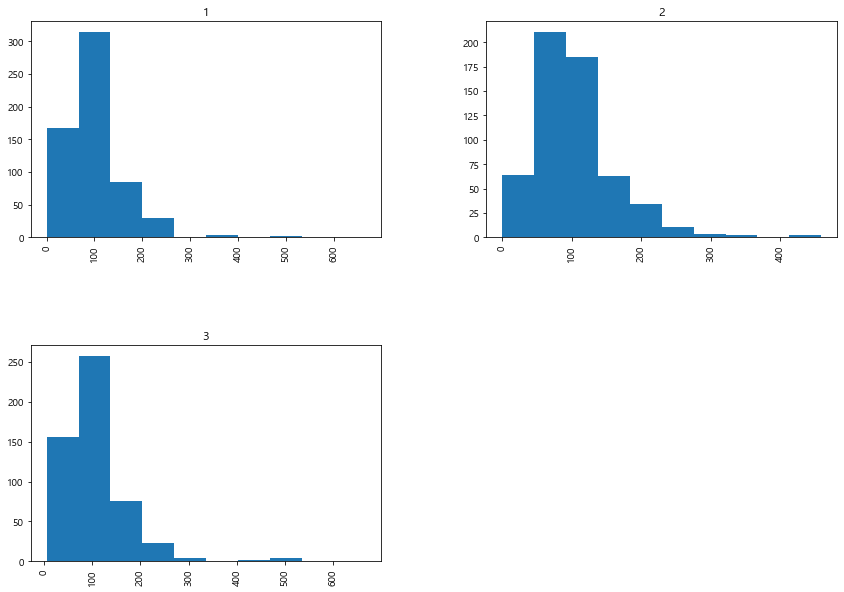

In [57]:
sss.hist(column= 'Target', by = 'Ox_Chamber', figsize=(14,10))

In [63]:
c1 = sss[df['Ox_Chamber']==1][['Ox_Chamber','Target']].reset_index(drop = True)
c2 = sss[df['Ox_Chamber']==2][['Ox_Chamber','Target']].reset_index(drop = True)
c3 = sss[df['Ox_Chamber']==3][['Ox_Chamber','Target']].reset_index(drop = True)

In [64]:
c1

,Ox_Chamber,Target
0,1,55
1,1,96
2,1,105
3,1,79
4,1,96
...,...,...
600,1,105
601,1,42
602,1,42
603,1,24


In [65]:
c2

,Ox_Chamber,Target
0,2,141
1,2,55
2,2,96
3,2,105
4,2,79
...,...,...
570,2,242
571,2,98
572,2,108
573,2,96


In [66]:
c3

,Ox_Chamber,Target
0,3,141
1,3,174
2,3,177
3,3,28
4,3,134
...,...,...
519,3,117
520,3,42
521,3,84
522,3,105


In [67]:
f_result = stats.f_oneway(c1['Target'],c2['Target'],c3['Target'])

f,p = f_result.statistic, f_result.pvalue

print("one-way")
print('F 통계량 : {}'.format(f))
print('p-value : {}'.format(p))

# 대립가설 채택 
# 귀무가설 : 그룹간 평균이 같다.   대립가설 : 그룹간의 평균이 다르다
# 그룹간의 평균차이가 있다고 할 수 있다. 

one-way
F 통계량 : 0.8311357729673903
p-value : 0.4357311165077905


In [96]:
df1= sss[sss['type']=='wet']['Target'].reset_index(drop = True)

In [97]:
df1

0      79
1      45
2      54
3      84
4      30
       ..
709    78
710    42
711    42
712    24
713    84
Name: Target, Length: 714, dtype: int64

In [98]:
df2= sss[sss['type']=='dry']['Target'].reset_index(drop = True)

In [99]:
df2

0      141
1       55
2       96
3      105
4       96
      ... 
985    102
986     86
987    136
988    122
989    217
Name: Target, Length: 990, dtype: int64

In [100]:
t_result = stats.ttest_ind(df1, df2)

In [101]:
t, p = t_result.statistic, t_result.pvalue

In [102]:
print('2-sample t-test')
print('t :{}'.format(t))
print('p :{}'.format(p))

2-sample t-test
t :-3.0791689503102972
p :0.0021089660669557897


# 카이제곱 검정 - 공정별 챔버랑 타켓 

In [225]:
df = pd.read_csv("C:/Users/USER/Desktop/반도체 공정/데이터/Etching.CSV",encoding='euc-kr')
df

,Unnamed: 0,No_Die,Etching_Chamber,Process 3,Thin F4,Thin F3,Thin F2,Thin F1,Temp_Etching,Source_Power,Selectivity,Lot_Num,Wafer_Num,Datetime
0,0,NOLSM325131325,1,Etching,340.0,1522.0,3644.0,5732.0,72.651,52.103,1.030,13,28,01-03-2019
1,1,NOLSM326132326,2,Etching,265.0,1513.0,3631.0,5729.0,70.267,52.004,1.038,13,29,01-03-2019
2,2,NOLSM327133327,3,Etching,411.0,1568.0,3653.0,5729.0,71.231,50.846,1.005,13,30,01-03-2019
3,3,NOLSM328134328,1,Etching,328.0,1326.0,3661.0,5718.0,71.295,51.665,1.025,13,31,01-03-2019
4,4,NOLSM329135329,2,Etching,219.0,1451.0,3637.0,5729.0,72.983,50.787,1.038,13,32,01-03-2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1699,1699,NOLSM8483211,3,Etching,177.0,1510.0,3655.0,5726.0,71.550,50.601,1.015,32,11,28-02-2019
1700,1700,NOLSM8493212,3,Etching,180.0,1433.0,3643.0,5690.0,70.718,50.424,1.011,32,12,28-02-2019
1701,1701,NOLSM8503213,2,Etching,142.0,1472.0,3649.0,5700.0,71.295,50.602,1.015,32,13,28-02-2019
1702,1702,NOLSM8513214,1,Etching,127.0,1341.0,3646.0,5722.0,71.199,50.544,1.014,32,14,28-02-2019


In [226]:
target= pd.read_csv("C:/Users/USER/Desktop/반도체 공정/데이터/target양불.csv",encoding='euc-kr')
target

,Unnamed: 0,Target
0,0,bad
1,1,good
2,2,good
3,3,good
4,4,good
...,...,...
1699,1699,good
1700,1700,good
1701,1701,good
1702,1702,good


In [227]:
target=pd.DataFrame(target['Target'])
target

,Target
0,bad
1,good
2,good
3,good
4,good
...,...
1699,good
1700,good
1701,good
1702,good


In [228]:
df=pd.DataFrame(df['Etching_Chamber'])
df

,Etching_Chamber
0,1
1,2
2,3
3,1
4,2
...,...
1699,3
1700,3
1701,2
1702,1


In [229]:
df= pd.concat([df, target], axis = 1)

In [230]:
df

,Etching_Chamber,Target
0,1,bad
1,2,good
2,3,good
3,1,good
4,2,good
...,...,...
1699,3,good
1700,3,good
1701,2,good
1702,1,good


In [231]:
df1=pd.crosstab(index = df['Target'], columns= df['Etching_Chamber'])

In [232]:
df1

Etching_Chamber,1,2,3
Target,,,
bad,114,107,139
good,478,441,425


In [ ]:
plt.boxplot

In [132]:
chi, pval, dof, expected = stats.chi2_contingency(df1)
    
print("Oxidation_chi-square test")
print("chisq : {0:0.3f}".format(chi))
print("p : {0:0.3f}".format(pval))
print("degree of freedom : {}".format(dof))
print("expected value : \n{}".format(expected.round(3)))

Oxidation_chi-square test
chisq : 0.660
p : 0.719
degree of freedom : 2
expected value : 
[[127.817 121.479 110.704]
 [477.183 453.521 413.296]]


In [141]:
chi, pval, dof, expected = stats.chi2_contingency(df1)
    
print("lithography_chi-square test")
print("chisq : {0:0.3f}".format(chi))
print("p : {0:0.3f}".format(pval))
print("degree of freedom : {}".format(dof))
print("expected value : \n{}".format(expected.round(3)))

lithography_chi-square test
chisq : 4.546
p : 0.103
degree of freedom : 2
expected value : 
[[122.113 115.986 121.901]
 [455.887 433.014 455.099]]


In [150]:
chi, pval, dof, expected = stats.chi2_contingency(df1)
    
print("photo_soft_chi-square test")
print("chisq : {0:0.3f}".format(chi))
print("p : {0:0.3f}".format(pval))
print("degree of freedom : {}".format(dof))
print("expected value : \n{}".format(expected.round(3)))

photo_soft_chi-square test
chisq : 4.894
p : 0.087
degree of freedom : 2
expected value : 
[[124.014 119.577 116.408]
 [462.986 446.423 434.592]]


In [187]:
chi, pval, dof, expected = stats.chi2_contingency(df1)
    
print("Ion_Implantation_chi-square test")
print("chisq : {0:0.3f}".format(chi))
print("p : {0:0.3f}".format(pval))
print("degree of freedom : {}".format(dof))
print("expected value : \n{}".format(expected.round(3)))

Ion_Implantation_chi-square test
chisq : 6.276
p : 0.043
degree of freedom : 2
expected value : 
[[125.07  115.775 119.155]
 [466.93  432.225 444.845]]


In [178]:
chi, pval, dof, expected = stats.chi2_contingency(df1)
    
print("Etching_chi-square test")
print("chisq : {0:0.3f}".format(chi))
print("p : {0:0.3f}".format(pval))
print("degree of freedom : {}".format(dof))
print("expected value : \n{}".format(expected.round(3)))

Etching_chi-square test
chisq : 6.276
p : 0.043
degree of freedom : 2
expected value : 
[[125.07  115.775 119.155]
 [466.93  432.225 444.845]]


soft , 이온주입, 에칭 세개가 유의하다고 판정.
이온주입이랑 에칭의 챔버는 같기 때문에
soft랑 에칭으로 챔버 연결하여 카이제곱해봄

# 카이제곱 검정 - soft랑 Etxhing(이온주입이랑 같이 때문에 이거 하나로만 함)

In [189]:
df = pd.read_csv("C:/Users/USER/Desktop/반도체 공정/데이터/챔버2개만.CSV")
df

,Chamber,Total,bad,good
0,11,202,44,158
1,12,184,43,141
2,13,201,48,153
3,21,198,59,139
4,22,184,41,143
5,23,184,31,153
6,31,192,30,162
7,32,180,35,145
8,33,179,27,152


In [202]:
df.drop('Total', axis = 1, inplace = True)

In [203]:
df

,Chamber,bad,good
0,11,44,158
1,12,43,141
2,13,48,153
3,21,59,139
4,22,41,143
5,23,31,153
6,31,30,162
7,32,35,145
8,33,27,152


In [208]:
chi, pval, dof, expected = stats.chi2_contingency(df)
    
print("chi-square test")
print("chisq : {0:0.3f}".format(chi))
print("p : {0:0.3f}".format(pval))
print("degree of freedom : {}".format(dof))
print("expected value : \n{}".format(expected.round(3)))

chi-square test
chisq : 48.889
p : 0.000
degree of freedom : 16
expected value : 
[[ 22.174  40.091 150.735]
 [ 20.404  36.892 138.705]
 [ 22.278  40.28  151.443]
 [ 22.798  41.221 154.981]
 [ 21.445  38.774 145.781]
 [ 21.549  38.962 146.489]
 [ 23.215  41.974 157.812]
 [ 22.069  39.903 150.027]
 [ 22.069  39.903 150.027]]
